Traffic sign classifier from https://www.datacamp.com/community/tutorials/tensorflow-tutorial

In [290]:
import tensorflow as tf
import os
from skimage import *
import numpy as np
import matplotlib.pyplot as plt
import random

In [291]:
a = tf.constant([1,2,3,4])
b = tf.constant([2])

In [292]:
c = tf.multiply(a,b)

In [293]:
print (c)

Tensor("Mul_11:0", shape=(4,), dtype=int32)


In [294]:
a = a+2

In [295]:
print (a)

Tensor("add_11:0", shape=(4,), dtype=int32)


In [296]:
sess = tf.Session()

In [297]:
print(sess.run(a))

[3 4 5 6]


In [298]:
def load_data(dir_path):
    directories = [d for d in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, d))]
    labels  = []
    images = []
    for d in directories:
        subdir_path = os.path.join(dir_path, d)
        filenames = [os.path.join(subdir_path, f) for f in os.listdir(subdir_path) if f.endswith('ppm')]
        for f in filenames:
            images.append(skimage.data.imread(f))
            labels.append(d)
    return images, labels

In [299]:
ROOT_PATH = "/home/akshay/Documents/Books/Code"

In [300]:
trg_dir = os.path.join(ROOT_PATH, "Training")
test_dir = os.path.join(ROOT_PATH,"Testing")

In [301]:
trg_images, trg_labels = load_data(trg_dir)

In [302]:
#print(trg_images.ndim)

In [303]:
trg_images = np.asarray(trg_images)
trg_labels = np.asarray(trg_labels)

In [304]:
print (trg_images.shape)

(4575,)


In [305]:
print(trg_labels.size)

4575


<function matplotlib.pyplot.show(*args, **kw)>

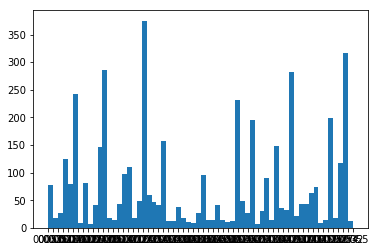

In [306]:
plot = plt.hist(trg_labels, 62)
plt.show

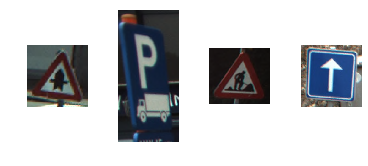

In [307]:
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(trg_images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

In [308]:
uni_labels = set(trg_labels)

In [309]:
print (uni_labels)

{'00052', '00037', '00007', '00011', '00023', '00036', '00004', '00040', '00025', '00017', '00034', '00051', '00046', '00003', '00027', '00047', '00029', '00005', '00061', '00059', '00049', '00016', '00043', '00032', '00039', '00045', '00006', '00002', '00024', '00058', '00042', '00008', '00015', '00013', '00020', '00056', '00026', '00009', '00021', '00050', '00060', '00028', '00053', '00048', '00055', '00000', '00044', '00010', '00038', '00018', '00014', '00033', '00057', '00035', '00001', '00012', '00041', '00031', '00019', '00022', '00054', '00030'}


In [310]:
#print (uni_labels.index('00052'))

In [311]:
trg_images28 = [skimage.transform.resize(image, (28,28)) for image in trg_images]

/home/akshay/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/akshay/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [312]:
trg_images28 =  np.asarray(trg_images28)
print(trg_images28.shape)

(4575, 28, 28, 3)


In [313]:
trg_images28 = skimage.color.rgb2gray(trg_images28)

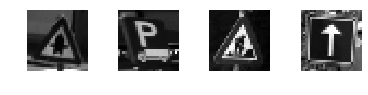

In [314]:
traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(trg_images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

tensorflow code begins 

In [361]:
graph = tf.Graph()

with graph.as_default():
    
    x = tf.placeholder(dtype=tf.float32, shape = [None, 28, 28])
    y = tf.placeholder(dtype = tf.int32, shape = [None])

    xflat = tf.contrib.layers.flatten(x)

    logits = tf.contrib.layers.fully_connected(xflat,62,tf.nn.relu)

    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))

    trg_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.005).minimize(loss)

    correct_pred = tf.argmax(logits,1)

    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    init = tf.global_variables_initializer()


In [362]:
print("images_flat: ", xflat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten/flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax:0", shape=(?,), dtype=int64)


training begins

In [363]:
#tf.set_random_seed(123)

In [364]:
sess = tf.Session(graph =graph)
_=sess.run([init])

In [365]:
for i in range(201):
    #print('Epoch no. ',i)
    _,accuracy_val = sess.run([trg_optimizer,accuracy], feed_dict = {x:trg_images28, y:trg_labels})
    if (i%10 == 0):
        print('Loss: ', accuracy_val)
    #print('done with epoch')

Loss:  23.543169
Loss:  27.549946
Loss:  30.549946
Loss:  30.728743
Loss:  30.561968
Loss:  30.838688
Loss:  31.235191
Loss:  31.467978
Loss:  31.61093
Loss:  31.619017
Loss:  31.643497
Loss:  31.77705
Loss:  31.838907
Loss:  31.883717
Loss:  31.866886
Loss:  31.915628
Loss:  32.01552
Loss:  32.175518
Loss:  32.3047
Loss:  32.467102
Loss:  32.685028


In [366]:
sample_indexes = random.sample(range(len(trg_images28)),10)
sample_images = [trg_images28[i]  for i in sample_indexes]
sample_labels = [trg_labels[i] for i in sample_indexes]

In [367]:
predictions = sess.run([correct_pred], feed_dict={x:sample_images})[0]

In [368]:
print (sample_labels)
print (predictions)

['00032', '00033', '00046', '00031', '00032', '00047', '00053', '00020', '00006', '00007']
[19 38 32 32 32 22 61 32 32 32]


In [369]:
sample_labels = [int(sample_labels[i]) for i in range(len(sample_labels))]

In [370]:
print (sample_labels)

[32, 33, 46, 31, 32, 47, 53, 20, 6, 7]


In [371]:
test_imgs, test_labels = load_data(test_dir)
test_labels = [int(test_labels[i]) for i in range(len(test_labels))]
test_images28 = [skimage.transform.resize(image,(28,28)) for image in test_imgs]
test_images28 = np.asarray(test_images28)
test_images28 = skimage.color.rgb2gray(test_images28)
predictions = sess.run([correct_pred], feed_dict={x:test_images28})[0]

In [372]:
match_count = sum([int(y==ycap) for y,ycap in zip(test_labels, predictions)])

In [373]:
accuracy = match_count/len(test_labels)

In [374]:
print(accuracy*100)

26.666666666666668


In [376]:
sess.close()